In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, rmsprop

from keras import backend as K

C:\Users\samsung\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [101]:
data = pd.read_csv('20132017인구데이터.csv', encoding='utf-8', engine='python')

In [4]:
data.isnull().sum()

지역명                       0
일시                        0
CO                        0
NO2                       0
O3                        0
PM10                      0
PM25                   5840
SO2                       0
average humidity          0
average temperature       0
average wind              0
highest temperature       0
highest wind              0
lowest temperature        0
rainfall                  0
성별코드=1                    0
성별코드=2                    0
연령대코드=1                   0
연령대코드=10                  0
연령대코드=11                  0
연령대코드=12                  0
연령대코드=13                  0
연령대코드=14                  0
연령대코드=15                  0
연령대코드=16                  0
연령대코드=17                  0
연령대코드=18                  0
연령대코드=2                   0
연령대코드=3                   0
연령대코드=4                   0
연령대코드=5                   0
연령대코드=6                   0
연령대코드=7                   0
연령대코드=8                   0
연령대코드=9                   0
전체빈도                

In [102]:
data = data.fillna(0)

In [103]:
data.columns

Index(['지역명', '일시', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2',
       'average humidity', 'average temperature', 'average wind',
       'highest temperature', 'highest wind', 'lowest temperature', 'rainfall',
       '성별코드=1', '성별코드=2', '연령대코드=1', '연령대코드=10', '연령대코드=11', '연령대코드=12',
       '연령대코드=13', '연령대코드=14', '연령대코드=15', '연령대코드=16', '연령대코드=17', '연령대코드=18',
       '연령대코드=2', '연령대코드=3', '연령대코드=4', '연령대코드=5', '연령대코드=6', '연령대코드=7',
       '연령대코드=8', '연령대코드=9', '전체빈도', '인구수'],
      dtype='object')

In [104]:
data = data.drop(data.columns[15:-2], axis=1)

In [105]:
data = data.drop(data.columns[1], axis=1)
data

,지역명,CO,NO2,O3,PM10,PM25,SO2,average humidity,average temperature,average wind,highest temperature,highest wind,lowest temperature,rainfall,전체빈도,인구수
0,11,0.659384,0.043583,0.008785,38.870290,0.000000,0.005748,73.500,-4.700,3.200,0.000,5.800,-8.700,3.100,1.0,10195064
1,11,0.405944,0.021615,0.024592,19.399234,0.000000,0.004991,40.800,-11.700,4.200,-4.800,7.800,-15.100,0.000,36.0,10195064
2,11,0.519053,0.028730,0.018228,30.796578,0.000000,0.006430,42.800,-13.200,2.800,-9.300,5.000,-16.400,0.000,40.0,10195064
3,11,0.749525,0.048790,0.008629,45.719675,0.000000,0.007105,44.300,-10.700,1.800,-5.800,4.300,-14.800,0.000,46.0,10195064
4,11,1.020625,0.065136,0.003988,63.488479,0.000000,0.007688,59.400,-7.000,2.300,-1.200,4.600,-12.100,0.000,31.0,10195064
5,11,1.141318,0.055007,0.008522,89.329009,0.000000,0.009908,59.400,-6.300,1.900,-2.000,4.200,-9.400,0.000,0.0,10195064
6,11,1.111491,0.063489,0.006509,76.312411,0.000000,0.008508,53.600,-5.100,1.700,0.100,4.100,-8.800,0.000,47.0,10195064
7,11,1.105150,0.056143,0.010722,71.856787,0.000000,0.009563,53.400,-4.600,2.200,-0.700,4.900,-6.800,0.000,45.0,10195064
8,11,0.536739,0.031674,0.019845,34.291667,0.000000,0.006554,38.500,-9.000,3.000,-6.400,5.100,-10.700,0.000,49.0,10195064
9,11,0.719428,0.046256,0.011499,41.973725,0.000000,0.007671,41.300,-8.300,2.300,-3.600,4.600,-12.300,0.000,37.0,10195064


In [9]:
area = pd.get_dummies(data['지역명'])
area

,11,26,27,28,29,30,31,41,42,43,44,45,46,47,48,49
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df = pd.concat([area, data], axis=1)

In [11]:
df.columns

Index([                   11,                    26,                    27,
                          28,                    29,                    30,
                          31,                    41,                    42,
                          43,                    44,                    45,
                          46,                    47,                    48,
                          49,                 '지역명',                  'CO',
                       'NO2',                  'O3',                'PM10',
                      'PM25',                 'SO2',    'average humidity',
       'average temperature',        'average wind', 'highest temperature',
              'highest wind',  'lowest temperature',            'rainfall',
                      '전체빈도',                 '인구수'],
      dtype='object')

In [12]:
del df['지역명']

In [13]:
pop = scale(data['인구수'])
pop

array([ 2.20746868,  2.20746868,  2.20746868, ..., -0.8034108 ,
       -0.8034108 , -0.8034108 ])

In [106]:
df['인구'] = pop
df

,11,26,27,28,29,30,31,41,42,43,...,SO2,average humidity,average temperature,average wind,highest temperature,highest wind,lowest temperature,rainfall,전체빈도,인구
0,0,0,0,0,0,1,0,0,0,0,...,0.004099,63.400000,4.000000,1.500000,10.400000,4.100000,-1.300000,0.000000,3.0,2.207469
1,0,0,0,0,0,1,0,0,0,0,...,0.001735,81.600000,25.100000,1.800000,29.500000,4.600000,19.900000,0.000000,12.0,2.207469
2,0,0,0,0,0,0,1,0,0,0,...,0.003002,28.800000,0.700000,4.100000,3.800000,6.700000,-2.000000,0.000000,6.0,2.207469
3,0,0,0,0,0,0,0,0,0,0,...,0.003075,87.842857,26.378571,1.157143,30.392857,3.442857,23.992857,8.471429,15.0,2.207469
4,0,0,0,0,0,0,1,0,0,0,...,0.004345,79.400000,20.600000,1.800000,25.200000,5.200000,17.100000,0.000000,0.0,2.207469
5,0,0,0,0,0,0,0,0,0,0,...,0.002717,60.707143,12.892857,2.135714,20.292857,5.421429,6.385714,0.000000,23.0,2.207469
6,1,0,0,0,0,0,0,0,0,0,...,0.004160,56.000000,14.000000,4.500000,18.400000,6.100000,11.400000,0.000000,36.0,2.207469
7,0,0,0,0,0,1,0,0,0,0,...,0.006433,80.000000,5.000000,1.200000,10.400000,3.500000,0.900000,0.000000,0.0,2.207469
8,0,0,0,0,0,0,0,0,0,1,...,0.003138,50.460000,14.760000,1.780000,22.400000,4.620000,8.620000,0.000000,9.0,2.207469
9,0,0,0,0,0,0,0,0,0,0,...,0.003239,81.264286,15.800000,0.678571,20.535714,1.850000,12.850000,0.000000,23.0,2.207469


In [15]:
del df['인구수']

In [16]:
df.columns

Index([                   11,                    26,                    27,
                          28,                    29,                    30,
                          31,                    41,                    42,
                          43,                    44,                    45,
                          46,                    47,                    48,
                          49,                  'CO',                 'NO2',
                        'O3',                'PM10',                'PM25',
                       'SO2',    'average humidity', 'average temperature',
              'average wind', 'highest temperature',        'highest wind',
        'lowest temperature',            'rainfall',                '전체빈도',
                        '인구'],
      dtype='object')

In [18]:
df = df.sample(frac=1).reset_index(drop=True)
df

,11,26,27,28,29,30,31,41,42,43,...,SO2,average humidity,average temperature,average wind,highest temperature,highest wind,lowest temperature,rainfall,전체빈도,인구
0,0,0,0,0,0,1,0,0,0,0,...,0.004099,63.400000,4.000000,1.500000,10.400000,4.100000,-1.300000,0.000000,3.0,-0.526872
1,0,0,0,0,0,1,0,0,0,0,...,0.001735,81.600000,25.100000,1.800000,29.500000,4.600000,19.900000,0.000000,12.0,-0.525851
2,0,0,0,0,0,0,1,0,0,0,...,0.003002,28.800000,0.700000,4.100000,3.800000,6.700000,-2.000000,0.000000,6.0,-0.643034
3,0,0,0,0,0,0,0,0,0,0,...,0.003075,87.842857,26.378571,1.157143,30.392857,3.442857,23.992857,8.471429,15.0,-0.157820
4,0,0,0,0,0,0,1,0,0,0,...,0.004345,79.400000,20.600000,1.800000,25.200000,5.200000,17.100000,0.000000,0.0,-0.641188
5,0,0,0,0,0,0,0,0,0,0,...,0.002717,60.707143,12.892857,2.135714,20.292857,5.421429,6.385714,0.000000,23.0,-0.160472
6,1,0,0,0,0,0,0,0,0,0,...,0.004160,56.000000,14.000000,4.500000,18.400000,6.100000,11.400000,0.000000,36.0,2.189238
7,0,0,0,0,0,1,0,0,0,0,...,0.006433,80.000000,5.000000,1.200000,10.400000,3.500000,0.900000,0.000000,0.0,-0.526967
8,0,0,0,0,0,0,0,0,0,1,...,0.003138,50.460000,14.760000,1.780000,22.400000,4.620000,8.620000,0.000000,9.0,-0.510394
9,0,0,0,0,0,0,0,0,0,0,...,0.003239,81.264286,15.800000,0.678571,20.535714,1.850000,12.850000,0.000000,23.0,0.053240


In [46]:
tr = df[:-3000]
tst = df[-3000:]

In [47]:
len(tr)

26216

In [48]:
len(tst)

3000

In [49]:
tr.shape

(26216, 31)

In [112]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(64, input_shape=(30,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer=rmsprop(), metrics=['mse', root_mean_squared_error])

x = np.array(tr.drop(['전체빈도'], axis=1))
y = np.array(tr['전체빈도'])

train_history = model.fit(x, y, epochs=300, batch_size=32, validation_split=0.1,
                         shuffle=True)

Train on 23594 samples, validate on 2622 samples
Epoch 1/300
23594/23594 [==============================] - 2s 92us/step - loss: 178.0663 - mean_squared_error: 178.0663 - root_mean_squared_error: 12.9634 - val_loss: 155.6580 - val_mean_squared_error: 155.6580 - val_root_mean_squared_error: 12.2587
Epoch 2/300
23594/23594 [==============================] - 1s 44us/step - loss: 117.5189 - mean_squared_error: 117.5189 - root_mean_squared_error: 10.5473 - val_loss: 89.9580 - val_mean_squared_error: 89.9580 - val_root_mean_squared_error: 9.2213
Epoch 3/300
23594/23594 [==============================] - 1s 42us/step - loss: 91.8557 - mean_squared_error: 91.8557 - root_mean_squared_error: 9.3312 - val_loss: 92.2004 - val_mean_squared_error: 92.2004 - val_root_mean_squared_error: 9.3575
Epoch 4/300
23594/23594 [==============================] - 1s 41us/step - loss: 88.0006 - mean_squared_error: 88.0006 - root_mean_squared_error: 9.1361 - val_loss: 97.4453 - val_mean_squared_error: 97.4453 - va

23594/23594 [==============================] - 1s 49us/step - loss: 77.0229 - mean_squared_error: 77.0229 - root_mean_squared_error: 8.4659 - val_loss: 77.3980 - val_mean_squared_error: 77.3980 - val_root_mean_squared_error: 8.4834
Epoch 35/300
23594/23594 [==============================] - 1s 51us/step - loss: 76.5443 - mean_squared_error: 76.5443 - root_mean_squared_error: 8.4327 - val_loss: 77.3857 - val_mean_squared_error: 77.3857 - val_root_mean_squared_error: 8.4920
Epoch 36/300
23594/23594 [==============================] - 1s 47us/step - loss: 76.7992 - mean_squared_error: 76.7992 - root_mean_squared_error: 8.4185 - val_loss: 75.2114 - val_mean_squared_error: 75.2114 - val_root_mean_squared_error: 8.3450
Epoch 37/300
23594/23594 [==============================] - 1s 45us/step - loss: 76.5751 - mean_squared_error: 76.5751 - root_mean_squared_error: 8.4556 - val_loss: 77.3551 - val_mean_squared_error: 77.3551 - val_root_mean_squared_error: 8.4753
Epoch 38/300
23594/23594 [=======

23594/23594 [==============================] - 1s 47us/step - loss: 74.9999 - mean_squared_error: 74.9999 - root_mean_squared_error: 8.3412 - val_loss: 76.7554 - val_mean_squared_error: 76.7554 - val_root_mean_squared_error: 8.4284
Epoch 68/300
23594/23594 [==============================] - 1s 49us/step - loss: 74.9134 - mean_squared_error: 74.9134 - root_mean_squared_error: 8.3422 - val_loss: 88.8125 - val_mean_squared_error: 88.8125 - val_root_mean_squared_error: 9.1145
Epoch 69/300
23594/23594 [==============================] - 1s 49us/step - loss: 75.0125 - mean_squared_error: 75.0125 - root_mean_squared_error: 8.3254 - val_loss: 77.5635 - val_mean_squared_error: 77.5635 - val_root_mean_squared_error: 8.4691
Epoch 70/300
23594/23594 [==============================] - 1s 47us/step - loss: 74.7083 - mean_squared_error: 74.7083 - root_mean_squared_error: 8.3091 - val_loss: 76.0101 - val_mean_squared_error: 76.0101 - val_root_mean_squared_error: 8.3782
Epoch 71/300
23594/23594 [=======

23594/23594 [==============================] - 1s 47us/step - loss: 73.8135 - mean_squared_error: 73.8135 - root_mean_squared_error: 8.2914 - val_loss: 81.3338 - val_mean_squared_error: 81.3338 - val_root_mean_squared_error: 8.6340
Epoch 101/300
23594/23594 [==============================] - 1s 48us/step - loss: 73.6321 - mean_squared_error: 73.6321 - root_mean_squared_error: 8.2577 - val_loss: 79.3678 - val_mean_squared_error: 79.3678 - val_root_mean_squared_error: 8.6032
Epoch 102/300
23594/23594 [==============================] - 1s 47us/step - loss: 73.7869 - mean_squared_error: 73.7869 - root_mean_squared_error: 8.2714 - val_loss: 76.8578 - val_mean_squared_error: 76.8578 - val_root_mean_squared_error: 8.4359
Epoch 103/300
23594/23594 [==============================] - 1s 45us/step - loss: 73.4314 - mean_squared_error: 73.4314 - root_mean_squared_error: 8.2626 - val_loss: 77.6607 - val_mean_squared_error: 77.6607 - val_root_mean_squared_error: 8.4926
Epoch 104/300
23594/23594 [===

23594/23594 [==============================] - 1s 47us/step - loss: 73.0271 - mean_squared_error: 73.0271 - root_mean_squared_error: 8.2471 - val_loss: 77.8333 - val_mean_squared_error: 77.8333 - val_root_mean_squared_error: 8.4798
Epoch 134/300
23594/23594 [==============================] - 1s 50us/step - loss: 72.7486 - mean_squared_error: 72.7486 - root_mean_squared_error: 8.2229 - val_loss: 80.2484 - val_mean_squared_error: 80.2484 - val_root_mean_squared_error: 8.6332
Epoch 135/300
23594/23594 [==============================] - 1s 46us/step - loss: 72.9145 - mean_squared_error: 72.9145 - root_mean_squared_error: 8.2306 - val_loss: 76.7615 - val_mean_squared_error: 76.7615 - val_root_mean_squared_error: 8.4445
Epoch 136/300
23594/23594 [==============================] - 1s 50us/step - loss: 72.6851 - mean_squared_error: 72.6851 - root_mean_squared_error: 8.2082 - val_loss: 78.3356 - val_mean_squared_error: 78.3356 - val_root_mean_squared_error: 8.4757
Epoch 137/300
23594/23594 [===

23594/23594 [==============================] - 1s 47us/step - loss: 72.1899 - mean_squared_error: 72.1899 - root_mean_squared_error: 8.1816 - val_loss: 77.6139 - val_mean_squared_error: 77.6139 - val_root_mean_squared_error: 8.4827
Epoch 167/300
23594/23594 [==============================] - 1s 46us/step - loss: 72.3358 - mean_squared_error: 72.3358 - root_mean_squared_error: 8.1824 - val_loss: 76.1910 - val_mean_squared_error: 76.1910 - val_root_mean_squared_error: 8.3671
Epoch 168/300
23594/23594 [==============================] - 1s 51us/step - loss: 72.6024 - mean_squared_error: 72.6024 - root_mean_squared_error: 8.2269 - val_loss: 75.9002 - val_mean_squared_error: 75.9002 - val_root_mean_squared_error: 8.3507
Epoch 169/300
23594/23594 [==============================] - 1s 48us/step - loss: 72.2028 - mean_squared_error: 72.2028 - root_mean_squared_error: 8.1917 - val_loss: 79.4584 - val_mean_squared_error: 79.4584 - val_root_mean_squared_error: 8.5884
Epoch 170/300
23594/23594 [===

23594/23594 [==============================] - 1s 54us/step - loss: 71.6304 - mean_squared_error: 71.6304 - root_mean_squared_error: 8.1625 - val_loss: 75.6956 - val_mean_squared_error: 75.6956 - val_root_mean_squared_error: 8.3421
Epoch 200/300
23594/23594 [==============================] - 1s 48us/step - loss: 71.6769 - mean_squared_error: 71.6769 - root_mean_squared_error: 8.1566 - val_loss: 79.9309 - val_mean_squared_error: 79.9309 - val_root_mean_squared_error: 8.5763
Epoch 201/300
23594/23594 [==============================] - 1s 50us/step - loss: 71.7789 - mean_squared_error: 71.7789 - root_mean_squared_error: 8.1669 - val_loss: 76.1444 - val_mean_squared_error: 76.1444 - val_root_mean_squared_error: 8.3834
Epoch 202/300
23594/23594 [==============================] - 1s 52us/step - loss: 71.4435 - mean_squared_error: 71.4435 - root_mean_squared_error: 8.1433 - val_loss: 75.4268 - val_mean_squared_error: 75.4268 - val_root_mean_squared_error: 8.3271
Epoch 203/300
23594/23594 [===

23594/23594 [==============================] - 1s 46us/step - loss: 71.2777 - mean_squared_error: 71.2777 - root_mean_squared_error: 8.1125 - val_loss: 76.9590 - val_mean_squared_error: 76.9590 - val_root_mean_squared_error: 8.4101
Epoch 233/300
23594/23594 [==============================] - 1s 50us/step - loss: 71.3464 - mean_squared_error: 71.3464 - root_mean_squared_error: 8.1566 - val_loss: 77.4322 - val_mean_squared_error: 77.4322 - val_root_mean_squared_error: 8.4450
Epoch 234/300
23594/23594 [==============================] - 1s 51us/step - loss: 71.2623 - mean_squared_error: 71.2623 - root_mean_squared_error: 8.1267 - val_loss: 78.5352 - val_mean_squared_error: 78.5352 - val_root_mean_squared_error: 8.5366
Epoch 235/300
23594/23594 [==============================] - 1s 49us/step - loss: 71.2393 - mean_squared_error: 71.2393 - root_mean_squared_error: 8.1358 - val_loss: 80.8729 - val_mean_squared_error: 80.8729 - val_root_mean_squared_error: 8.6833
Epoch 236/300
23594/23594 [===

23594/23594 [==============================] - 1s 49us/step - loss: 71.0012 - mean_squared_error: 71.0012 - root_mean_squared_error: 8.1183 - val_loss: 75.4540 - val_mean_squared_error: 75.4540 - val_root_mean_squared_error: 8.3591
Epoch 266/300
23594/23594 [==============================] - 1s 50us/step - loss: 70.7058 - mean_squared_error: 70.7058 - root_mean_squared_error: 8.1143 - val_loss: 75.9705 - val_mean_squared_error: 75.9705 - val_root_mean_squared_error: 8.3622
Epoch 267/300
23594/23594 [==============================] - 1s 54us/step - loss: 70.8542 - mean_squared_error: 70.8542 - root_mean_squared_error: 8.1011 - val_loss: 81.3014 - val_mean_squared_error: 81.3014 - val_root_mean_squared_error: 8.7018
Epoch 268/300
23594/23594 [==============================] - 1s 57us/step - loss: 70.8222 - mean_squared_error: 70.8222 - root_mean_squared_error: 8.1026 - val_loss: 79.5635 - val_mean_squared_error: 79.5635 - val_root_mean_squared_error: 8.6238
Epoch 269/300
23594/23594 [===

23594/23594 [==============================] - 1s 49us/step - loss: 69.9216 - mean_squared_error: 69.9216 - root_mean_squared_error: 8.0755 - val_loss: 80.0137 - val_mean_squared_error: 80.0137 - val_root_mean_squared_error: 8.6129
Epoch 299/300
23594/23594 [==============================] - 1s 47us/step - loss: 70.5056 - mean_squared_error: 70.5056 - root_mean_squared_error: 8.1022 - val_loss: 82.1085 - val_mean_squared_error: 82.1085 - val_root_mean_squared_error: 8.7332
Epoch 300/300
23594/23594 [==============================] - 1s 51us/step - loss: 70.4227 - mean_squared_error: 70.4227 - root_mean_squared_error: 8.0831 - val_loss: 75.3378 - val_mean_squared_error: 75.3378 - val_root_mean_squared_error: 8.3413


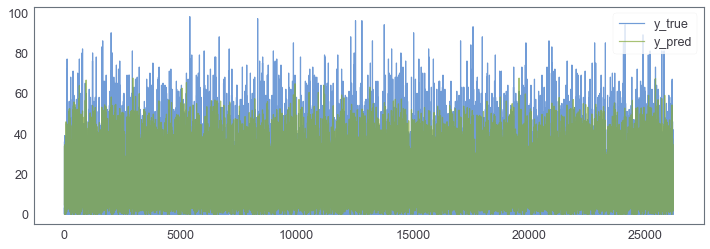

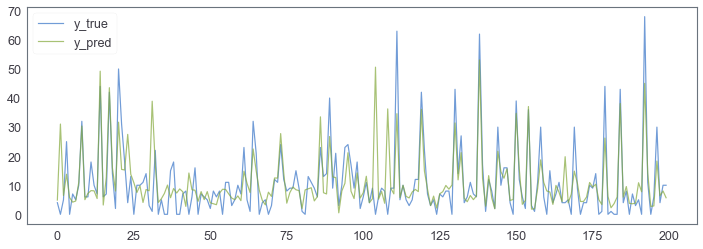

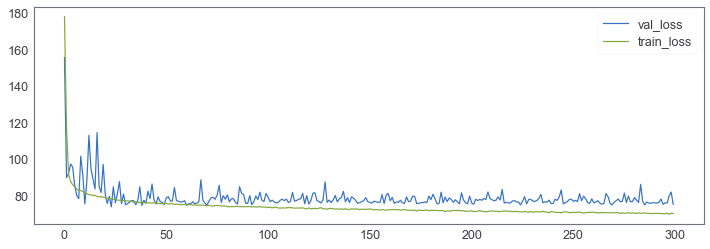

In [123]:
plt.figure(figsize=(12, 4))
plt.plot(range(y.size), y, alpha=0.7, label='y_true')
plt.plot(range(y.size), model.predict(x), alpha=0.7, label='y_pred')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(tst['전체빈도'][:200].size), tst['전체빈도'][:200], alpha=0.7, label='y_true')
plt.plot(range(tst['전체빈도'][:200].size), model.predict(tst.drop(['전체빈도'], axis=1)[:200]),
         alpha=0.7, label='y_pred')
plt.legend()
plt.show()

train_history.history.keys()

val_loss_lst = train_history.history['val_loss']
train_loss_lst = train_history.history['loss']

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(val_loss_lst)), val_loss_lst, label='val_loss')
plt.plot(range(0, len(train_loss_lst)), train_loss_lst, label='train_loss')
plt.legend()
plt.show()

In [114]:
res = pd.concat([pd.DataFrame(model.predict(tst.drop(['전체빈도'], axis=1))), tst['전체빈도'].reset_index(drop=True)], axis=1)
res = (res['전체빈도'] - res[0]) ** 2
print("test rmse :", np.sqrt(res.sum() / len(res)))

test rmse : 8.69947590095222


In [45]:
df.to_csv('shuffled.csv', encoding='euc-kr', index=False)

In [108]:
data['인구'] = pop
data

,지역명,CO,NO2,O3,PM10,PM25,SO2,average humidity,average temperature,average wind,highest temperature,highest wind,lowest temperature,rainfall,전체빈도,인구수,인구
0,11,0.659384,0.043583,0.008785,38.870290,0.000000,0.005748,73.500,-4.700,3.200,0.000,5.800,-8.700,3.100,1.0,10195064,2.207469
1,11,0.405944,0.021615,0.024592,19.399234,0.000000,0.004991,40.800,-11.700,4.200,-4.800,7.800,-15.100,0.000,36.0,10195064,2.207469
2,11,0.519053,0.028730,0.018228,30.796578,0.000000,0.006430,42.800,-13.200,2.800,-9.300,5.000,-16.400,0.000,40.0,10195064,2.207469
3,11,0.749525,0.048790,0.008629,45.719675,0.000000,0.007105,44.300,-10.700,1.800,-5.800,4.300,-14.800,0.000,46.0,10195064,2.207469
4,11,1.020625,0.065136,0.003988,63.488479,0.000000,0.007688,59.400,-7.000,2.300,-1.200,4.600,-12.100,0.000,31.0,10195064,2.207469
5,11,1.141318,0.055007,0.008522,89.329009,0.000000,0.009908,59.400,-6.300,1.900,-2.000,4.200,-9.400,0.000,0.0,10195064,2.207469
6,11,1.111491,0.063489,0.006509,76.312411,0.000000,0.008508,53.600,-5.100,1.700,0.100,4.100,-8.800,0.000,47.0,10195064,2.207469
7,11,1.105150,0.056143,0.010722,71.856787,0.000000,0.009563,53.400,-4.600,2.200,-0.700,4.900,-6.800,0.000,45.0,10195064,2.207469
8,11,0.536739,0.031674,0.019845,34.291667,0.000000,0.006554,38.500,-9.000,3.000,-6.400,5.100,-10.700,0.000,49.0,10195064,2.207469
9,11,0.719428,0.046256,0.011499,41.973725,0.000000,0.007671,41.300,-8.300,2.300,-3.600,4.600,-12.300,0.000,37.0,10195064,2.207469


In [109]:
data.columns

Index(['지역명', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'average humidity',
       'average temperature', 'average wind', 'highest temperature',
       'highest wind', 'lowest temperature', 'rainfall', '전체빈도', '인구수', '인구'],
      dtype='object')

In [110]:
del data['인구수']

In [111]:
data.to_csv('this.csv', encoding='euc-kr', index=False)